## Question 1. Test of greedy and E-greedy policy

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def bandit(epsilon, accuracy):
    n_arms=10
    n_steps= 1000 # 1000   # time step   # action(arm을 선택하는 것)의 횟수 
    n_trials= 500 # 500     # simulation 횟수 # 2000 

    Result_array=np.zeros(n_steps)   # Result array for plotting
    Result_array2=np.zeros(n_steps)   # Result array for plotting optimal action selection
    P_arm=np.random.randn(n_arms)    # true reward (각 arm의 reward가 추출될 때 평균으로 사용됨)


    for i in range(n_trials):     # 1번의 stimulation 마다,
        Q_arm=np.zeros(n_arms)    # 각 arm에 대한 estimated value
        N_visits=np.zeros(n_arms)    # 방문한 횟수
    
        for j in range(n_steps): # 1번의 action 마다,
            # 각 arm의 reward 만듦. 
            R_arm=np.random.normal(P_arm,1,n_arms)  # 평균이 P_arm인 정규분포에서 추출.        
        
            # 1. 어떤 방식으로 arm을 선택할지 
            # 1) Exploration (epsilon 확률만큼)
            if np.random.rand(1) < epsilon:       
                action=np.random.choice(n_arms,1) # n_arm(0~9) 중 하나의 arm을 랜덤으로 고름
            # 2) Exploitation 
            else:
                action=np.argmax(Q_arm)  # value가 가장 큰 arm을 고름.

            # 2. Estimated value Q를 업데이트 하기
            if N_visits[action]==0:                  
                Q_arm[action]+=R_arm[action]      # 처음 방문하는 arm이라면 Q=R
            else:
                Q_arm[action]+=(R_arm[action]-Q_arm[action])/N_visits[action]   # Q = R-Q/N 
            
            N_visits[action]+=1  # size: n_arm
            Result_array[j]+=R_arm[action] # size: n_steps
        
            # 3. 정확도 계산
            if np.argmax(P_arm)==action:  # 가장 좋은 선택을 했는지. 
                Result_array2[j]+=1
    accuracy = Result_array2/n_trials
    return accuracy

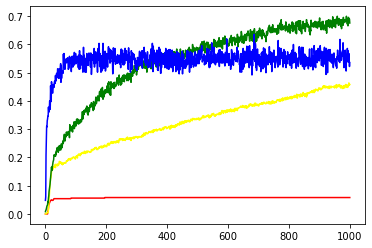

In [9]:
accuracy=[]
result1 = bandit(0, accuracy)
accuracy=[]
result2 = bandit(0.01, accuracy)
accuracy=[]
result3 = bandit(0.1, accuracy)
accuracy=[]
result4 = bandit(0.5, accuracy)

plt.plot(result1, color='red')    # epsilon = 0
plt.plot(result2, color='yellow') # epsilon = 0.01
plt.plot(result3, color='green')  # epsilon = 0.1
plt.plot(result4, color='blue')   # epsilon = 0.5

## Question 2. Optimistic initial value

In [41]:
import numpy as np
import matplotlib.pyplot as plt

def bandit_2(init_q, accuracy):
    n_arms=12 # Question 1과의 차이점_1
    n_steps= 1000 # action(arm을 선택하는 것)의 횟수 
    n_trials= 500 # simulation 횟수 # 2000 
    epsilon = 0   # epsilon은 0(greedy policy)으로 고정

    Result_array=np.zeros(n_steps)   # Result array for plotting
    Result_array2=np.zeros(n_steps)   # Result array for plotting optimal action selection
    P_arm=np.random.randn(n_arms)    # true reward (각 arm의 reward가 추출될 때 평균으로 사용됨)


    for i in range(n_trials):     # 1번의 stimulation 마다,
        Q_arm=np.full(n_arms, init_q)   # Question 1과의 차이점_2
        Q_arm=Q_arm.astype(np.float64)
        N_visits=np.zeros(n_arms)    # 방문한 횟수
    
        for j in range(n_steps): # 1번의 action 마다,
            # 각 arm의 reward 만듦. 
            R_arm=np.random.normal(P_arm,1,n_arms)  # 평균이 P_arm인 정규분포에서 추출.        
        
            # 1. 어떤 방식으로 arm을 선택할지 
            # 1) Exploration (epsilon 확률만큼)
            if np.random.rand(1) < epsilon:       
                action=np.random.choice(n_arms,1) # n_arm(0~9) 중 하나의 arm을 랜덤으로 고름
            # 2) Exploitation 
            else:
                action=np.argmax(Q_arm)  # value가 가장 큰 arm을 고름.

            # 2. Estimated value Q를 업데이트 하기
            if N_visits[action]==0:                  
                Q_arm[action]+=R_arm[action]      # 처음 방문하는 arm이라면 Q=R
            else:
                Q_arm[action]+=(R_arm[action]-Q_arm[action])/N_visits[action]   # Q = R-Q/N 
            
            N_visits[action]+=1  # size: n_arm
            Result_array[j]+=R_arm[action] # size: n_steps
        
            # 3. 정확도 계산
            if np.argmax(P_arm)==action:  # 가장 좋은 선택을 했는지. 
                Result_array2[j]+=1
    accuracy = Result_array2/n_trials
    return accuracy

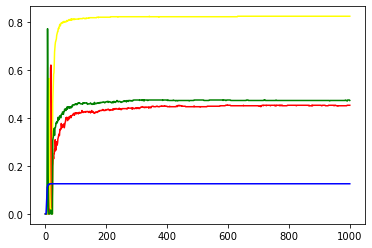

In [44]:
initial_Q_values = [5, 10, 20, 0]
plot_color = ['red', 'yellow', 'green', 'blue']

for i in range(4):
    accuracy = []
    result = bandit_2(initial_Q_values[i], accuracy)
    plt.plot(result, color=plot_color[i])

## Question 3. UCB algorithm

In [63]:
import numpy as np
import matplotlib.pyplot as plt

def bandit_3(c, epsilon, accuracy):
    n_arms=10 
    n_steps= 1000 # action(arm을 선택하는 것)의 횟수 
    n_trials= 500 # simulation 횟수 # 2000 

    Result_array=np.zeros(n_steps)   # Result array for plotting
    Result_array2=np.zeros(n_steps)   # Result array for plotting optimal action selection
    P_arm=np.random.randn(n_arms)    # true reward 

    for i in range(n_trials):     # 1번의 stimulation 마다,
        Q_arm=np.zeros(n_arms)
        N_visits=np.zeros(n_arms)
        UCB_values = np.zeros(n_arms)
    
        for t in range(n_steps): # 1번의 action 마다,
            R_arm=np.random.normal(P_arm,1,n_arms)  
            
            # 1. 어떤 방식으로 arm을 선택할지 
            # 1) Exploration 
            if np.random.rand(1) < epsilon:       
                action=np.random.choice(n_arms,1) # n_arm(0~9) 중 하나의 arm을 랜덤으로 고름
            # 2) Exploitation 
            else:
                for a in range(n_arms):
                    if N_visits[a]!=0:
                        ucb_value = Q_arm[a] + c*(np.log(t) / N_visits[a])
                        UCB_values[a] = ucb_value
                    else: 
                        UCB_values[a] = 1e500     # 큰 숫자를 넣음. 
                action=np.argmax(UCB_values)  
                # Question 1과의 차이점:
                # value가 가장 큰 arm을 고르는데, 이 때 UCB를 적용함. 
                
                
            # 2. Estimated value Q를 업데이트 하기
            if N_visits[action]==0:
                Q_arm[action]+=R_arm[action]      # 처음 방문하는 arm이라면 Q=R
            else:
                Q_arm[action]+=(R_arm[action]-Q_arm[action])/(N_visits[action])   # Q = R-Q/N 
                
        
            N_visits[action]+=1  # size: n_arm
            Result_array[t]+=R_arm[action] # size: n_steps
        
            # 3. 정확도 계산
            if np.argmax(P_arm)==action:  # 가장 좋은 선택을 했는지. 
                Result_array2[t]+=1
    accuracy = Result_array2/n_trials
    return accuracy

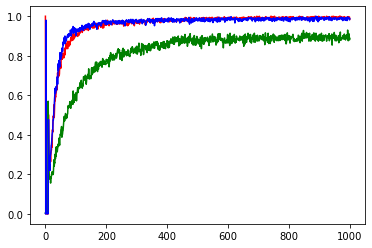

In [64]:
epsilon = [0, 0.1, 0.01]
plot_color = ['red', 'green', 'blue']

# 1. Confidence level = 1
c = 1
for i in range(3):
    e = epsilon[i]
    accuracy = []
    result = bandit_3(c, e, accuracy)
    plt.plot(result, color=plot_color[i])

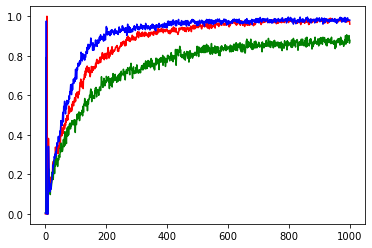

In [65]:
# 2. Confidence level = 1.5
c = 1.5
for i in range(3):
    e = epsilon[i]
    accuracy = []
    result = bandit_3(c, e, accuracy)
    plt.plot(result, color=plot_color[i])

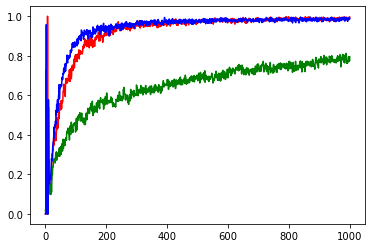

In [66]:
# 3. Confidence level = 2
c = 2
for i in range(3):
    e = epsilon[i]
    accuracy = []
    result = bandit_3(c, e, accuracy)
    plt.plot(result, color=plot_color[i])

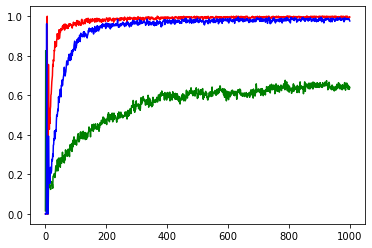

In [67]:
# 4. Confidence level = 4
c = 1
for i in range(3):
    e = epsilon[i]
    accuracy = []
    result = bandit_3(c, e, accuracy)
    plt.plot(result, color=plot_color[i])